<a href="https://colab.research.google.com/github/charchit319/miniproject_datamining/blob/main/Datamining_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Data

`Data is taken from kaggle. Link to data set is` [Dataset Link](https://www.kaggle.com/datasets/priyankraval/nurse-stress-prediction-wearable-sensors/data)

**Dataset Description**

> 1. Data Collection Context

>> *Data gathered over one week from 15 female nurses aged 30 to 55 years, during regular shifts at a hospital. Collection Phases: Two phases - Phase-I (April 15, 2020, to August 6, 2020) and Phase-II (October 8, 2020, to December 11, 2020). Exclusion Criteria: Pregnancy, heavy smoking, mental disorders, chronic or cardiovascular diseases.*

> 2. Data Captured

>> *Electrodermal activity, Heart Rate, and skin temperature of the nurse subjects. Survey Responses: Periodic smartphone-administered surveys capturing contributing factors to detected stress events. Measurement Technologies: Utilized Empatica E4 for data collection, specifically focusing on Galvanic Skin Response and Blood Volume Pulse (BVP) readings.*

> 3. Merge CSV File Information

>> *This dataset comprises approximately 11.5 million entries across nine columns: X, Y, Z: Orientation data (256 unique entries each). EDA, HR, TEMP: Physiological measurements (EDA: 274,452 unique, HR: 6,268 unique, TEMP: 599 unique). id: 18 categorical identifiers. datetime: Extensive date and time entries (10.6 million unique). label: Categorical states or classes (three unique entries). The dataset offers a wide array of continuous physiological measurements alongside orientation data, facilitating stress detection, health monitoring, and related research endeavours.*



> **Setting up to read data in google collab from Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> **Importing Necessary library**

In [2]:
import numpy as np
import pandas as pd
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

**Read Datasets**

In [3]:
project_data = pd.read_csv('/content/drive/MyDrive/merged_data.csv.zip',compression='zip')

<ipython-input-3-0e05122bfcd6>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  project_data = pd.read_csv('/content/drive/MyDrive/merged_data.csv.zip',compression='zip')


In [4]:
project_data.head() # display(project_data) # <- use this code to display whole data by commenting out.

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [5]:
print('\033[34m' + 'Information about data is' + '\033[0m')
print()
display(project_data.info())

Information about data is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


None

> **Exploratory Data Analysis**

In [6]:
print('\033[34m' + 'Checking wether any column has null value or not' + '\033[0m')
print()
print(project_data.isnull().sum())

Checking wether any column has null value or not

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64


In [ ]:
null_check = project_data.isnull()

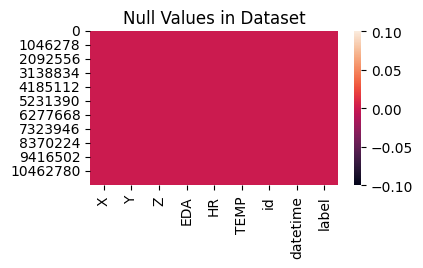

In [ ]:
plt.figure(figsize=(4,2))
plt.title('Null Values in Dataset')
sns.heatmap(null_check)
plt.show()

**Measure of  Skewness and Kurtosis in choosen data**
> 1. Skewness: Skewness measures the asymmetry of a distribution. It indicates whether the data is skewed to the left or right.

>> * Positively Skewed : In distribution if data is positively skewed then values are concentrated towards right side and left tail is spread out.![Image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Skewness_And_Kurtosis_2.png)

>> * Negatively Skewed : In distribution if data is negatively skewed then values are concentratedd towards left side and right tail is spread out,![Negatively Skewed](https://www.simplilearn.com/ice9/free_resources_article_thumb/Skewness_And_Kurtosis_3.png)

> 2. Kurtosis: Kurtosis is used to find the presence of outliers in our data. It gives us the total degree of outliers present.

>> * Positive Kurtosis(Leptokurtic): If the distribution is light-tailed and the top curve steeper, like pulling up the distribution, it is called Positive Kurtosis.

>> * Negative Kurtosis(Platykurtic): If the distribution is heavily-tailed and the peak can be flattered it is called Negative Kurtosis.

>> ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Skewness_And_Kurtosis_7.png)                                  
>> Figure a)showing Leptokurtic and  b)showing normal distribution  c)showing Platykurtic






In [4]:
from sklearn.preprocessing import LabelEncoder
LbEc = LabelEncoder()
project_data['datetime'] = LbEc.fit_transform(project_data['datetime'])

In [8]:
selected_columns = ['X','Y','Z','EDA','HR','TEMP','datetime']
for i in selected_columns:
  print(f"For Column {i}:")
  print(f"Skewness: {project_data[i].skew()}")
  print(f"Kurtosis: {project_data[i].kurt()}")
  print()

For Column X:
Skewness: 0.9662396920878424
Kurtosis: 0.8489368705986484

For Column Y:
Skewness: -0.20626391357535862
Kurtosis: -0.06743471926335465

For Column Z:
Skewness: -0.3490533290581033
Kurtosis: 0.25403111851784255

For Column EDA:
Skewness: 3.0261409778597668
Kurtosis: 12.16955252489096

For Column HR:
Skewness: 0.9278425500827757
Kurtosis: 2.3275633791378176

For Column TEMP:
Skewness: -0.2828160906982833
Kurtosis: -1.0887129456181879

For Column datetime:
Skewness: 0.07867309134673556
Kurtosis: -1.1830988343138527



*From above we can see that skewness and kurtosis of EDA column is very high so we need to adjust the distribution of data for 'EDA' columns*

In [5]:
print('Orginal EDA:')
print(f"Skewness: {project_data['EDA'].skew()}")
print(f"Kurtosis: {project_data['EDA'].kurt()}")
print()
print('Adjusted EDA:')
project_data['EDA'] = project_data['EDA']**(1/3)
print(f"Skewness: {project_data['EDA'].skew()}")
print(f"Kurtosis: {project_data['EDA'].kurt()}")

Orginal EDA:
Skewness: 3.0261409778597668
Kurtosis: 12.16955252489096

Adjusted EDA:
Skewness: 0.8149977270533163
Kurtosis: -0.014348882227136706


In [ ]:
class histplot:
  def __init__ (self, data, column):
    self.data = data
    self.column = column
  def createplot(self):
    self.column = self.column.upper()
    if self.column == 'EDA':
      sns.histplot(self.data[self.column],color='orange',edgecolor = 'red',bins= 20, kde=True).set(title='Frequency Distribution of EDA')
      plt.ylabel('Frequency')
      plt.xlabel('Electrodermal Activity Values')
    elif self.column == 'HR':
      sns.histplot(self.data[self.column],color='orange',edgecolor = 'red',bins= 20, kde=True).set(title='Frequency Distribution of HR')
      plt.ylabel('Frequency')
      plt.xlabel('Heart Rate Values')
    else:
      sns.histplot(self.data[self.column],color='orange',edgecolor = 'red',bins= 20, kde=True).set(title='Frequency Distribution of TEMP')
      plt.ylabel('Frequency')
      plt.xlabel('Skin Temperature Values')
    return plt.show()

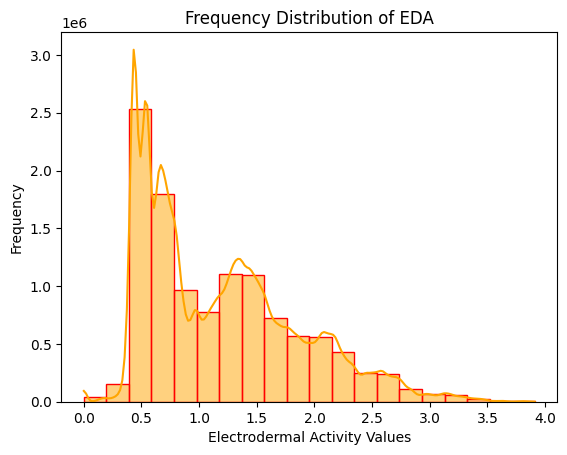

In [ ]:
plot = histplot(project_data,'EDA')
plot.createplot()

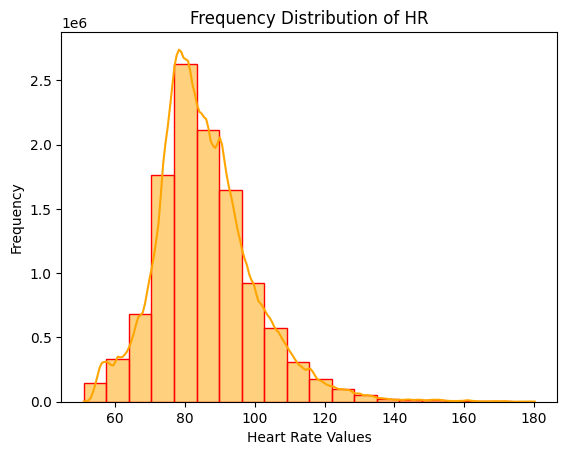

In [ ]:
HR_plot = histplot(project_data,'hr')
HR_plot.createplot()

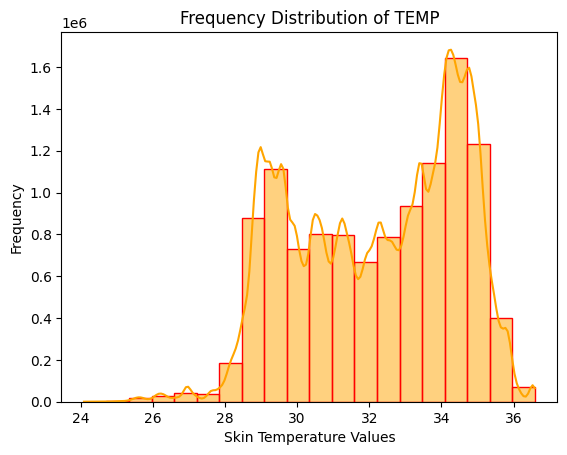

In [ ]:
TEMP_plot = histplot(project_data,'temp')
TEMP_plot.createplot()

In [ ]:
label_counts = project_data.groupby(['id','label']).size().unstack()

In [ ]:
label_counts.reset_index()

label,id,0.0,1.0,2.0
0,15,13441.0,NaN,248703.0
1,83,163204.0,NaN,1147516.0
2,94,348874.0,87458.0,87956.0
3,15,NaN,NaN,46987.0
4,5C,309121.0,295685.0,261124.0
5,6B,107522.0,NaN,718027.0
6,6D,503041.0,NaN,88322.0
7,7A,46082.0,388517.0,942743.0
8,7E,117124.0,NaN,136323.0
9,83,NaN,NaN,62099.0


Text(0, 0.5, 'Count')

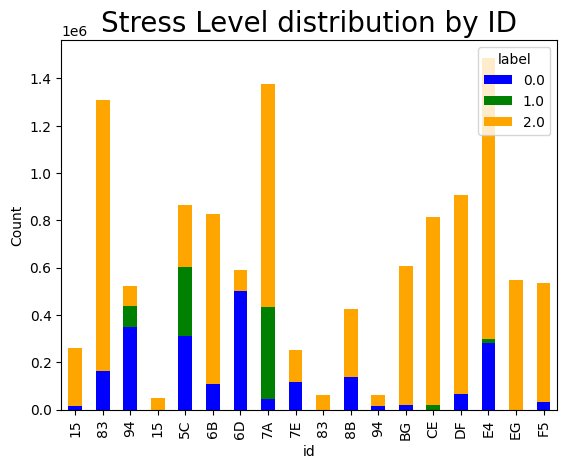

In [ ]:
colors = ['blue','green', 'orange']
label_counts.plot(kind='bar',stacked=True,color=colors)
plt.title('Stress Level distribution by ID', fontsize=20)
plt.xlabel('id')
plt.ylabel('Count')

> **Pearson's Correlation**
>> * Pearson’s Correlation is the Feature Selection Method.It shows direction and strength between dependant and independent variables.
This method best suited when there is a linear relation between dependant and Independent.
>> * Its value ranges from -1 to 1.
>> * -1 means there is strong -ve relation between dependant and independent.
>> * 0 means there is no relation between dependant and independent at all.
>> * 1 means there is strong +ve relation between dependant and independent.


> **Formula to calculate pearson's correlation is**

>> ![Image](https://miro.medium.com/v2/resize:fit:610/format:webp/1*nGzgrPTxO-r5wgSGyJ0ktQ.png)

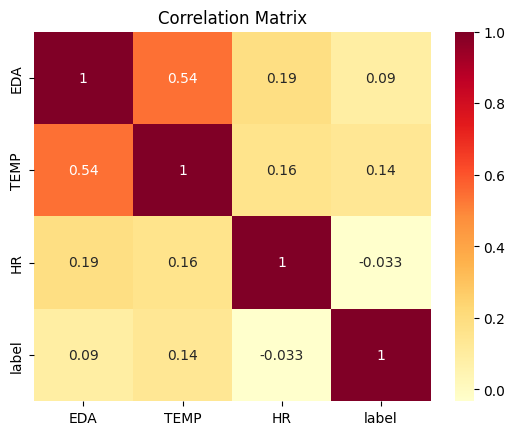


From above Correlation matrix we can see that:

There is No Significant Correlation Between EDA and Stress Level.

There is Moderate Positive Correlation Between Temperature and Stress Level.

There is No Significant Correlation Between HR and Stress Level.


In [ ]:
correlation = project_data[['EDA','TEMP','HR','label']].corr()
sns.heatmap(correlation,annot=True,cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()
print()
print("\033[1mFrom above Correlation matrix we can see that:\033[0m")
print()
corr_EDA = project_data['EDA'].corr(project_data['label'])
corr_TEMP = project_data['TEMP'].corr(project_data['label'])
corr_HR = project_data['HR'].corr(project_data['label'])
if abs(corr_EDA) >=0.2:
  print('There is Strong Correlation Between EDA and Stress Level.')
elif abs(corr_EDA) >=0.1:
  print('There is Moderate Correlation Between EDA and Stress Level.')
elif abs(corr_TEMP) <=-0.2:
  print('Ther is Negative Correlation Between EDA and Stress Level')
else:
  print('There is No Significant Correlation Between EDA and Stress Level.')
print()
if abs(corr_TEMP) >=0.2:
  print('There is Positive Correlation Between Temperature and Stress Level.')
elif abs(corr_TEMP) >=0.1:
  print('There is Moderate Positive Correlation Between Temperature and Stress Level.')
elif abs(corr_TEMP) <=-0.2:
  print('Ther is Negative Correlation Between Temperature and Stress Level')
else:
  print('There is No Significant Correlation Between Temperature and Stress Level.')
print()
if abs(corr_HR) >=0.2:
  print('There is Positive Correlation Between HR and Stress Level.')
elif abs(corr_HR) >=0.1:
  print('There is Moderate Positive Correlation Between HR and Stress Level.')
elif abs(corr_HR) <=-0.2:
  print('Ther is Negative Correlation Between HR and Stress Level')
else:
  print('There is No Significant Correlation Between HR and Stress Level.')

In [6]:
project_data = project_data.drop(columns=['id'],axis=1)
# display(project_data)

In [ ]:
print('\033[1mResult after dropping id column from orginal dataset is.\033[0m')
display(project_data)

Result after dropping id column from orginal dataset is.


,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,1.891746,99.43,31.17,5330929,2.0
1,-20.0,-69.0,-3.0,1.891746,99.43,31.17,5330930,2.0
2,-31.0,-78.0,-15.0,1.891746,99.43,31.17,5330931,2.0
3,-47.0,-65.0,-38.0,1.891746,99.43,31.17,5330932,2.0
4,-67.0,-57.0,-53.0,1.891746,99.43,31.17,5330933,2.0
...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,1.501638,88.37,33.77,7337366,2.0
11509047,-8.0,-50.0,27.0,1.501638,88.37,33.77,7337367,2.0
11509048,-28.0,-36.0,28.0,1.501638,88.37,33.77,7337368,2.0
11509049,-29.0,-29.0,30.0,1.501638,88.37,33.77,7337369,2.0


**Feature Selection**

In [7]:
Independent_Features = project_data.drop(columns=['label'],axis=1)
Dependent_Features = project_data['label']

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(Independent_Features, Dependent_Features)
# feature_importances = model.feature_importances_

In [ ]:
# feature_importances

In [8]:
importance = [0.02969783, 0.02853226, 0.03840064, 0.1821988 , 0.04034422,
       0.15342203, 0.52740422]
features = Independent_Features.columns

In [9]:
fig = go.Figure(data=[go.Bar(x=features, y=importance)])
fig.update_layout(
    title='Feature Selection',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='Features'),
    yaxis=dict(title='Values'),
    bargap=0.2
)

# Show the plot
fig.show()

In [ ]:
X = project_data.drop(columns=['label'],axis=1)
Y = project_data['label']

In [ ]:
X.head()

,X,Y,Z,EDA,HR,TEMP,datetime
0,-13.0,-61.0,5.0,1.891746,99.43,31.17,5330929
1,-20.0,-69.0,-3.0,1.891746,99.43,31.17,5330930
2,-31.0,-78.0,-15.0,1.891746,99.43,31.17,5330931
3,-47.0,-65.0,-38.0,1.891746,99.43,31.17,5330932
4,-67.0,-57.0,-53.0,1.891746,99.43,31.17,5330933


> **MinMax Scaler**
>> *The MinMax Scaler is a form of normalization that scales the values between 0 and 1. It gets its name because the maximum and minimum values of the feature are used for normalization. The concrete formal of the MinMax Scaler is:*


>>![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*_XNKwOmeAwYOCffKFVhrDg.png)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X = MinMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
print('\033[1mResult after normalization is.\033[0m')
X.head()

,0,1,2,3,4,5,6
0,0.450980,0.262745,0.521569,0.483865,0.374758,0.5664,0.501579
1,0.423529,0.231373,0.490196,0.483865,0.374758,0.5664,0.501579
2,0.380392,0.196078,0.443137,0.483865,0.374758,0.5664,0.501579
3,0.317647,0.247059,0.352941,0.483865,0.374758,0.5664,0.501579
4,0.239216,0.278431,0.294118,0.483865,0.374758,0.5664,0.501579


In [ ]:
X.to_pickle('/content/drive/MyDrive/EDA_Datamining.pkl')

In [ ]:
# X.shape

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(0.98)
# X_pca = pca.fit_transform(X)

In [ ]:
Y.to_pickle('/content/drive/MyDrive/EDA_Datamining_label.pkl')

In [ ]:
string = "Anurag"
string.lower()

'anurag'